In [1]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np
import random as rnd

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings('ignore')

#Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.columns.values)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [3]:
#inserting dummy column to test data
test_df['Survived'] = 0
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [5]:
train_df.info()
print('*'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [6]:
#filling missing values for Age and Embarked
train_df['Age']= train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(method='ffill')

In [29]:
#filling missing values for Test data
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

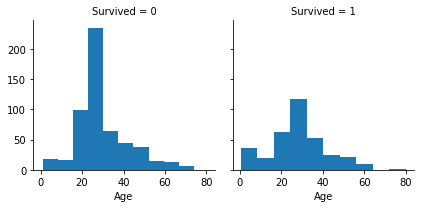

In [53]:
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age', bins=10)

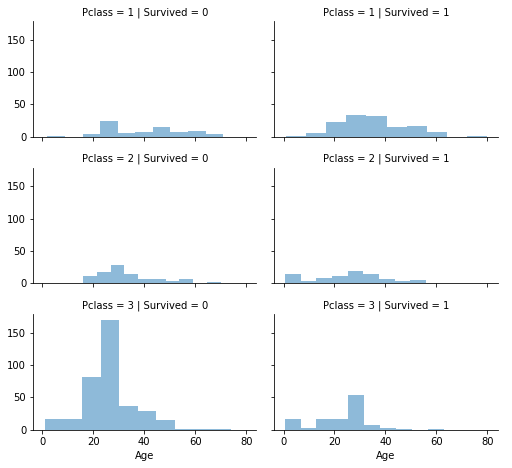

In [54]:
#passenger class wise survivals
grid2 = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid2.map(plt.hist, 'Age', alpha=.5, bins=10)
grid2.add_legend();

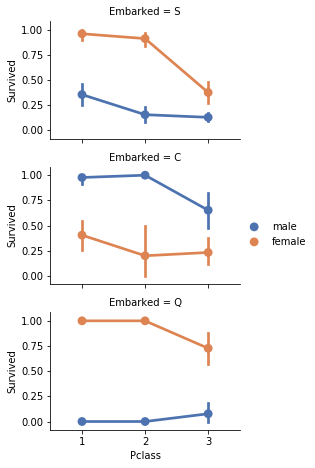

In [55]:
grid3 = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid3.add_legend()

In [30]:
#adding Child Columns Based on Age
train_df['Child'] = float('NaN')
train_df['Child'][train_df['Age']<18] = 1
train_df['Child'][train_df['Age']>=18] = 0

train_df['Family Size'] = train_df['SibSp']+train_df['Parch'] + 1

In [31]:
test_df["Child"]=float('NaN')
test_df["Child"][test_df["Age"] < 18] = 1
test_df["Child"][test_df["Age"] >= 18] = 0

test_df["Family Size"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df['Child'].hea

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      1.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
388    0.0
389    1.0
390    0.0
391    0.0
392    1.0
393    0.0
394    0.0
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
400    0.0
401    0.0
402    0.0
403    1.0
404    0.0
405    0.0
406    0.0
407    0.0
408    0.0
409    1.0
410    0.0
411    0.0
412    0.0
413    0.0
414    0.0
415    0.0
416    0.0
417    0.0
Name: Child, Length: 418, dtype: float64

In [32]:
#label encoding to age, sex and Embarked for train data
le_train_Sex = LabelEncoder()
le_train_Embarked = LabelEncoder()

In [33]:
#label encoding to age, sex and Embarked for test data
le_test_Sex =LabelEncoder()
le_test_Embarked =LabelEncoder()

In [34]:
train_df['Sex_n'] = le_train_Sex.fit_transform(train_df['Sex'])
train_df['Embarked_n'] = le_train_Embarked.fit_transform(train_df['Embarked'])

In [35]:
test_df['Sex_n'] = le_test_Sex.fit_transform(test_df['Sex'])
test_df['Embarked_n'] = le_test_Embarked.fit_transform(test_df['Embarked'])

In [36]:
test_df.shape,train_df.shape

((418, 16), (891, 16))

In [37]:
Y_train = train_df['Survived'].values
X_train = train_df[['Pclass','Sex_n','Child','Family Size']].values
X_test = test_df[['Pclass','Sex_n','Child','Family Size']].values
X_train.shape,X_test.shape,Y_train.shape

((891, 4), (418, 4), (891,))

In [25]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Child',
       'Family Size', 'Sex_n', 'Embarked_n'],
      dtype='object')

In [39]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.25

In [41]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.49

In [42]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.01

In [43]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.92

In [44]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.69

In [45]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [46]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.01

In [48]:
# Decision Tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.05

In [49]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.05

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.05
8,Decision Tree,83.05
0,Support Vector Machines,82.49
4,Naive Bayes,80.92
2,Logistic Regression,80.25
7,Linear SVC,80.25
5,Perceptron,79.69
1,KNN,79.01
6,Stochastic Gradient Decent,79.01


In [51]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [57]:
submission.to_excel('Titanic_Survival.xlsx')